In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# problem statement

To predict car price by using various features


# data gathering

In [88]:
df=pd.read_csv(r"E:\python daily notes\09_29_LR_one_hot_encoding/autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# exploratary data analysis

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [90]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# 1.symboling

In [91]:
df["symboling"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: symboling
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [92]:
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

# 2 normalized-losses

In [93]:
df["normalized-losses"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: normalized-losses
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [94]:
df["normalized-losses"].isna().sum()

0

In [95]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [96]:
df["normalized-losses"].replace({"?":np.nan},inplace=True)
df["normalized-losses"].isna().sum()

41

In [97]:
df.replace({"?":np.nan},inplace=True)

In [98]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [99]:
df.isna().mean()*100

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

In [100]:
df["normalized-losses"]

0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [101]:
df["normalized-losses"]=df["normalized-losses"].astype(float)
df["normalized-losses"]

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [102]:
df["normalized-losses"].mean()

122.0

In [103]:
df["normalized-losses"].median()

115.0

In [104]:
df["normalized-losses"]=df["normalized-losses"].fillna(df["normalized-losses"].median()).astype(int)
df["normalized-losses"]

0      115
1      115
2      115
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int32

In [105]:
#df.info()

# 3   make  

In [106]:
df["make"].info()
df["make"].isna().sum()
df["make"].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: make
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

# 4 fuel-type    

In [107]:
df["fuel-type"].info()
df["fuel-type"].isna().sum()
df["fuel-type"].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: fuel-type
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


gas       185
diesel     20
Name: fuel-type, dtype: int64

In [108]:
df["fuel-type"].replace({"gas":1,"diesel":0},inplace=True)
df["fuel-type"]
#df.info()


0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fuel-type, Length: 205, dtype: int64

In [109]:
fuel_type_values={"gas":1,"diesel":0}
fuel_type_values


{'gas': 1, 'diesel': 0}

# 5 aspiration   

In [110]:
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [111]:
df["aspiration"].replace({"std":1,"turbo":0},inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# 6 num-of-doors       

In [113]:
df["num-of-doors"].value_counts()
df["num-of-doors"].isna().sum()

2

In [114]:
df["num-of-doors"].replace({"four":4,"two":2},inplace=True)
#df.info()

In [115]:
df["num-of-doors"]=df["num-of-doors"].fillna(df["num-of-doors"].median()).astype(float)

In [116]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [117]:
num_door_values={"four":4,"two":2}
num_door_values

{'four': 4, 'two': 2}

# 7 body-style  

In [118]:
df["body-style"].info()
df["body-style"].isna().sum()
df["body-style"].value_counts()


<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: body-style
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [119]:
df=pd.get_dummies(df,columns=["body-style"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115,alfa-romero,1,1,2.0,rwd,front,88.6,168.8,...,111,5000,21,27,13495,1,0,0,0,0
1,3,115,alfa-romero,1,1,2.0,rwd,front,88.6,168.8,...,111,5000,21,27,16500,1,0,0,0,0
2,1,115,alfa-romero,1,1,2.0,rwd,front,94.5,171.2,...,154,5000,19,26,16500,0,0,1,0,0
3,2,164,audi,1,1,4.0,fwd,front,99.8,176.6,...,102,5500,24,30,13950,0,0,0,1,0
4,2,164,audi,1,1,4.0,4wd,front,99.4,176.6,...,115,5500,18,22,17450,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,1,4.0,rwd,front,109.1,188.8,...,114,5400,23,28,16845,0,0,0,1,0
201,-1,95,volvo,1,0,4.0,rwd,front,109.1,188.8,...,160,5300,19,25,19045,0,0,0,1,0
202,-1,95,volvo,1,1,4.0,rwd,front,109.1,188.8,...,134,5500,18,23,21485,0,0,0,1,0
203,-1,95,volvo,0,0,4.0,rwd,front,109.1,188.8,...,106,4800,26,27,22470,0,0,0,1,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    object 
 7   engine-location         205 non-null    object 
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

# 8  drive-wheels  

In [121]:
df["drive-wheels"].info()
df["drive-wheels"].isna().sum()
df["drive-wheels"].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: drive-wheels
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [122]:
df["drive-wheels"].value_counts().to_dict()


{'fwd': 120, 'rwd': 76, '4wd': 9}

In [123]:
df["drive-wheels"].replace({'fwd': 0, 'rwd': 1, '4wd': 2},inplace=True)

In [124]:
#df.info()

# 9 engine-location

In [125]:
df["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [126]:
df["engine-location"].replace({"front":1,"rear":0},inplace=True)
#df.info()

# 10 engine-type  

In [127]:
df["engine-type"].isna().sum()
df["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [128]:
df=pd.get_dummies(df,columns=["engine-type"])
#df.info()

# 10 num-of-cylinders  

In [129]:
df["num-of-cylinders"].isna().sum()
print(df["num-of-cylinders"].value_counts().to_dict())

{'four': 159, 'six': 24, 'five': 11, 'eight': 5, 'two': 4, 'three': 1, 'twelve': 1}


In [130]:
df["num-of-cylinders"].replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12},inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,115,alfa-romero,1,1,2.0,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
1,3,115,alfa-romero,1,1,2.0,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
2,1,115,alfa-romero,1,1,2.0,1,1,94.5,171.2,...,1,0,0,0,0,0,0,0,1,0
3,2,164,audi,1,1,4.0,0,1,99.8,176.6,...,0,1,0,0,0,0,1,0,0,0
4,2,164,audi,1,1,4.0,2,1,99.4,176.6,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
201,-1,95,volvo,1,0,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,0,0,1,0
203,-1,95,volvo,0,0,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0


In [131]:
num_cylinders_values={'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}
num_cylinders_values


{'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}

# 11 fuel-system

In [132]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [133]:
df=pd.get_dummies(df,columns=["fuel-system"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,alfa-romero,1,1,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,115,alfa-romero,1,1,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,1,115,alfa-romero,1,1,2.0,1,1,94.5,171.2,...,1,0,0,0,0,0,0,1,0,0
3,2,164,audi,1,1,4.0,0,1,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,2,164,audi,1,1,4.0,2,1,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,volvo,1,0,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,95,volvo,0,0,4.0,1,1,109.1,188.8,...,0,0,0,0,0,1,0,0,0,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

# 12 bore

In [135]:
df["bore"].isna().sum()

4

In [136]:
df["bore"]=df["bore"].fillna(df["bore"].median()).astype(float)

In [137]:
df["bore"].isna().sum()

0

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

# 13 stroke

In [139]:
df["stroke"].isna().sum()

4

In [140]:
df["stroke"]=df["stroke"].fillna(df["stroke"].median()).astype(float)

In [141]:
#df.info()

# 14 horsepower

In [142]:
df["horsepower"].isna().sum()

2

In [143]:
df["horsepower"]=df["horsepower"].fillna(df["horsepower"].median()).astype(float)

In [144]:
#df.info()

# 15 peak-rpm

In [145]:
df["peak-rpm"].isna().sum()

2

In [146]:
df["peak-rpm"]=df["peak-rpm"].fillna(df["peak-rpm"].median()).astype(float)

# 10 price

In [147]:
df["price"].isna().sum()

4

In [148]:
df["price"]=df["price"].fillna(df["price"].median()).astype(float)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

# feature selection

In [150]:
#analysis of correlation

In [151]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.457484,0.194311,0.059866,-0.663595,-0.111150,-0.212471,-0.531954,-0.357612,-0.232919,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
normalized-losses,0.457484,1.000000,0.104668,0.011273,-0.348850,0.133824,0.021510,-0.073709,-0.006837,0.058378,...,0.130717,0.130721,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358
fuel-type,0.194311,0.104668,1.000000,0.401397,-0.188496,-0.051874,-0.040070,-0.308346,-0.212679,-0.233880,...,0.085556,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,0.059866,0.011273,0.401397,1.000000,-0.052803,-0.153897,-0.057191,-0.257611,-0.234539,-0.300567,...,0.070070,0.066203,0.111748,0.323378,0.057191,-0.401397,-0.149190,0.050041,-0.394703,0.032857
num-of-doors,-0.663595,-0.348850,-0.188496,-0.052803,1.000000,-0.003230,0.139129,0.439635,0.385675,0.197735,...,-0.054764,-0.161052,-0.097150,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-0.079932
drive-wheels,-0.111150,0.133824,-0.051874,-0.153897,-0.003230,1.000000,-0.113823,0.366828,0.416076,0.376554,...,0.139453,0.131758,-0.188341,-0.310901,0.113823,0.051874,-0.055378,0.369782,-0.128419,0.065393
engine-location,-0.212471,0.021510,-0.040070,-0.057191,0.139129,-0.113823,1.000000,0.187790,0.050989,0.051698,...,0.031711,0.017192,0.029019,0.083975,0.014851,0.040070,0.008532,-0.132429,0.026114,0.008532
wheel-base,-0.531954,-0.073709,-0.308346,-0.257611,0.439635,0.366828,0.187790,1.000000,0.874587,0.795144,...,0.166152,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
length,-0.357612,-0.006837,-0.212679,-0.234539,0.385675,0.416076,0.050989,0.874587,1.000000,0.841118,...,0.244053,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
width,-0.232919,0.058378,-0.233880,-0.300567,0.197735,0.376554,0.051698,0.795144,0.841118,1.000000,...,0.348869,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158


In [152]:
#sns.pairplot(df)

Text(0.5, 1.0, 'scatter plot length vs price')

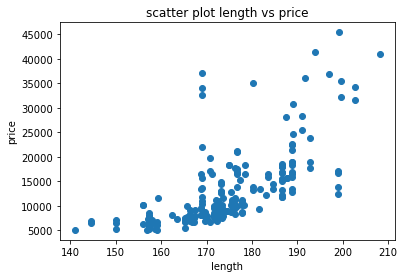

In [153]:
plt.scatter(df["length"],df["price"])
plt.xlabel("length")
plt.ylabel("price")
plt.title("scatter plot length vs price")

<AxesSubplot:xlabel='length', ylabel='price'>

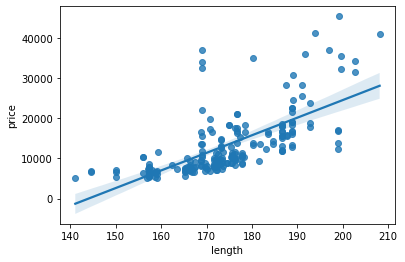

In [154]:
sns.regplot(x="length",y="price",data=df)

In [155]:
#above graph we can say if length increases price also increasing

# Train Test Split

In [156]:
df=df.select_dtypes(exclude="object")
x=df.drop("price",axis=1)
y=df["price"]
x.T


,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3.00,3.00,1.00,2.00,2.00,2.00,1.00,1.00,1.00,0.00,...,-1.00,-2.00,-1.00,-2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
normalized-losses,115.00,115.00,115.00,164.00,164.00,115.00,158.00,115.00,158.00,115.00,...,74.00,103.00,74.00,103.00,74.00,95.00,95.00,95.00,95.00,95.00
fuel-type,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00
aspiration,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,...,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
num-of-doors,2.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
drive-wheels,1.00,1.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
engine-location,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
wheel-base,88.60,88.60,94.50,99.80,99.40,99.80,105.80,105.80,105.80,99.50,...,104.30,104.30,104.30,104.30,104.30,109.10,109.10,109.10,109.10,109.10
length,168.80,168.80,171.20,176.60,176.60,177.30,192.70,192.70,192.70,178.20,...,188.80,188.80,188.80,188.80,188.80,188.80,188.80,188.80,188.80,188.80
width,64.10,64.10,65.50,66.20,66.40,66.30,71.40,71.40,71.40,67.90,...,67.20,67.20,67.20,67.20,67.20,68.90,68.80,68.90,68.90,68.90


In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)

In [158]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (164, 41)
x_test (41, 41)
y_train (164,)
y_test (41,)


# model training

In [159]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [160]:
#print coefficients (m) and intercept (y)
print(model.coef_)

[ 1.42135287e+02  6.54355697e+00 -3.14681737e+02 -1.67288528e+03
  1.93742368e+02 -6.13177716e+02 -4.80738707e+03  7.46241135e+01
 -9.18426078e+01  4.26880029e+02  2.28451230e+02  3.46202574e+00
  2.02657954e+03  1.36247882e+02  6.77580720e+02 -4.98372585e+03
 -6.40390186e+01  3.12161212e+01  2.33449168e+00  1.41235044e+02
  3.77230515e+01  2.47633921e+03 -1.00327595e+02 -1.07449678e+03
  1.10599836e+01 -1.31257482e+03 -1.58480258e+03  0.00000000e+00
  1.53460340e+02  1.75347889e+03 -1.09014027e+03 -6.21967195e+03
  6.98767558e+03 -7.55335629e+02 -5.44894612e+02  6.98767558e+03
  3.14681737e+02 -3.33799222e+03 -5.71793277e+02 -2.09234158e+03
  0.00000000e+00]


In [161]:
print(model.intercept_)

-53472.18166476872


In [162]:
#on which parameter the model has been trained
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

# model evaluation

In [163]:
#prediction on test data
y_pred=model.predict(x_test)
y_pred

array([ 8646.00846263, 19228.48005182, 12420.87576071, 12286.34493565,
       57188.70446847, 11220.23620865,  7376.36810933, 12975.2547646 ,
        7084.53069307, 23213.44192355, 15860.98338372,  9306.86001304,
        8275.29735035, 16281.85411624, 40286.84200159, 19446.03832918,
        9483.17693231, 18018.77552626, 12806.08286483, 10528.36083377,
        8088.78809835, 13622.91756096, 13347.03147531, 21177.21434288,
       19358.83832253, 19487.36781525, 10175.89970778,  8450.861196  ,
        9426.28933807, 18649.50722901,  6035.00002616,  5034.5768389 ,
        5662.29052358,  7424.91106214, 26987.3006898 , 26201.73976047,
       10497.80660769, 19323.29196859,  9259.19775293,  7563.09762511,
        9253.6020871 ])

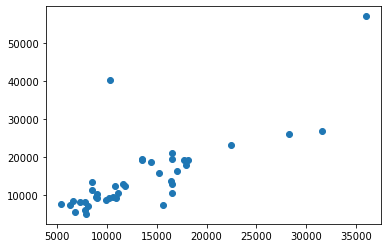

In [164]:
#scatter plot for prediction
plt.scatter(y_test,y_pred)

In [165]:
#plot is linear then we can say model has performed well

In [166]:
residuals=y_test-y_pred
residuals

131     1248.991537
117    -1078.480052
63     -1625.875761
56      -441.344936
49    -21188.704468
60     -2725.236209
19     -1081.368109
171    -1426.254765
163      973.469307
203     -743.441924
5       -610.983384
173     -358.860013
159     -487.297350
114      793.145884
129   -29991.842002
101    -5947.038329
61      1111.823068
116      -68.775526
1       3693.917135
2       5971.639166
35      -793.788098
10      2807.082439
167    -4898.031475
178    -4619.214343
6      -1648.838323
75     -2984.367815
99     -1226.899708
20     -1875.861196
39      -581.289338
102    -4250.507229
95      1763.999974
154     2863.423161
52      1132.709476
58      8220.088938
70      4612.699310
68      2046.260240
46       550.193392
103    -5824.291969
147      938.802247
76     -2174.097625
176     1644.397913
Name: price, dtype: float64

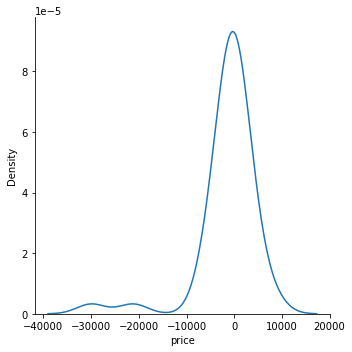

In [167]:
#plot this residuals
sns.displot(residuals,kind="kde")

In [168]:
#looks like normally distributed but on left hand side there are some outlier and errors
#assumption is it should be normally distributed

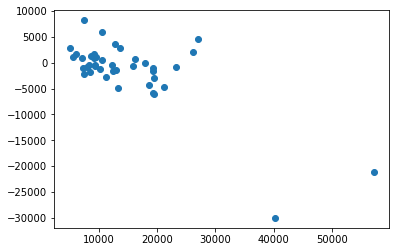

In [169]:
#scatterplot with respective predictions and residuals
plt.scatter(y_pred,residuals)

In [170]:
#these are uniform distribution with respective the test data ana residuals

In [171]:
mse=mean_squared_error(y_test,y_pred)  #testing data evaluation
print("mse : ",mse)

rmse=np.sqrt(mse)
print("rmse : ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("mae : ",mae)

r2_score=r2_score(y_test,y_pred)
print("r2 score : ",r2_score)



mse :  41231780.40873069
rmse :  6421.1977394198575
mae :  3390.8617837372963
r2 score :  0.06847764753410646


In [172]:
y_pred_train=model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)  #training data evaluation
print("mse : ",mse)

rmse=np.sqrt(mse)
print("rmse : ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("mae : ",mae)

r2=r2_score(y_train,y_pred_train)
print('R-squared is :',r2)

mse :  4660284.643709274
rmse :  2158.769242811578
mae :  1541.7626623036865


TypeError: 'numpy.float64' object is not callable

In [173]:
df.head(1).T

,0
symboling,3.00
normalized-losses,115.00
fuel-type,1.00
aspiration,1.00
num-of-doors,2.00
drive-wheels,1.00
engine-location,1.00
wheel-base,88.60
length,168.80
width,64.10


In [174]:
#UI parameter
symboling	3.00
normalized-losses	115.00
fuel-type	1.00
aspiration	1.00
num-of-doors	2.00
drive-wheels	1.00
engine-location	1.00
wheel-base	88.60
length	168.80
width	64.10
height	48.80
curb-weight	2548.00
num-of-cylinders	6.00
engine-size	130.00
bore	3.47
stroke	2.68
compression-ratio	9.00
horsepower	111.00
peak-rpm	5000.00
city-mpg	21.00
highway-mpg	27.00
body-style >> "hatchback"
engine-type >> "ohcv"
fuel-system >> "idi"


SyntaxError: invalid syntax (461193386.py, line 2)

In [175]:
symboling=3.00
normalized_losses=115.00
fuel_type=1.00
aspiration=1.00
num_of_doors=2.00
drive_wheels=1.00
engine_location=1.00
wheel_base=88.60
length=168.80
width=64.10
height=48.80
curb_weight=2548.00
num_of_cylinders=6.00
engine_size=130.00
bore=3.47
stroke=2.68
compression_ratio=9.00
horsepower=111.00
peak_rpm=5000.00
city_mpg=21.00
highway_mpg=27.00
body_style="hatchback"
engine_type="ohcv"
fuel_system="idi"


In [176]:
array=np.zeros(len(x.columns),dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [177]:
model.predict([array])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-53472.18166477])

In [178]:
array[0]=symboling
array[1]=normalized_losses
array[2]=fuel_type
array[3]=aspiration
array[4]=num_of_doors
array[5]=drive_wheels
array[6]=engine_location
array[7]=wheel_base
array[8]=length
array[9]=width
array[10]=height
array[11]=curb_weight
array[12]=num_of_cylinders
array[13]=engine_size
array[14]=bore
array[15]=stroke
array[16]=compression_ratio
array[17]=horsepower
array[18]=peak_rpm
array[19]=city_mpg
array[20]=highway_mpg

body_style="body-style_"+"convertible"
engine_type="engine-type_"+"dohcv"
fuel_system="fuel-system_"+"mpfi"

array


array([   3,  115,    1,    1,    2,    1,    1,   88,  168,   64,   48,
       2548,    6,  130,    3,    2,    9,  111, 5000,   21,   27,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0])

In [179]:
column_name=x.columns
column_name

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')

In [180]:
body_style_index=np.where(column_name==body_style)[0][0]
engine_type_index=np.where(column_name==engine_type)[0][0]
fuel_system_index=np.where(column_name==fuel_system)[0][0]

print(body_style_index)
print(engine_type_index)
print(fuel_system_index)

21
27
38


In [181]:
array[body_style_index]=1
array[engine_type_index]=1
array[fuel_system_index]=1
array

array([   3,  115,    1,    1,    2,    1,    1,   88,  168,   64,   48,
       2548,    6,  130,    3,    2,    9,  111, 5000,   21,   27,    1,
          0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0])

In [182]:
print(np.around(model.predict([array])[0],2))

21317.77


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [183]:
symboling=3.00
normalized_losses=115.00
fuel_type="gas"
aspiration=1.00
num_of_doors="two"
drive_wheels=1.00
engine_location=1.00
wheel_base=88.60
length=168.80
width=64.10
height=48.80
curb_weight=2548.00
num_of_cylinders="four"
engine_size=130.00
bore=3.47
stroke=2.68
compression_ratio=9.00
horsepower=111.00
peak_rpm=5000.00
city_mpg=21.00
highway_mpg=27.00
body_style="hatchback"
engine_type="ohcv"
fuel_system="idi"


In [184]:
print(fuel_type_values)
print(num_door_values)
print(num_cylinders_values)

{'gas': 1, 'diesel': 0}
{'four': 4, 'two': 2}
{'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}


In [185]:
array=np.zeros(len(x.columns),dtype=int)

num_of_doors= num_door_values[num_of_doors]
fuel_type=fuel_type_values[fuel_type]
num_of_cylinders=num_cylinders_values[num_of_cylinders]


array[0]=symboling
array[1]=normalized_losses
array[2]=fuel_type
array[3]=aspiration
array[4]=num_of_doors
array[5]=drive_wheels
array[6]=engine_location
array[7]=wheel_base
array[8]=length
array[9]=width
array[10]=height
array[11]=curb_weight
array[12]=num_of_cylinders
array[13]=engine_size
array[14]=bore
array[15]=stroke
array[16]=compression_ratio
array[17]=horsepower
array[18]=peak_rpm
array[19]=city_mpg
array[20]=highway_mpg

body_style="body-style_"+"convertible"
engine_type="engine-type_"+"dohcv"
fuel_system="fuel-system_"+"mpfi"

body_style_index=np.where(column_name==body_style)[0][0]
engine_type_index=np.where(column_name==engine_type)[0][0]
fuel_system_index=np.where(column_name==fuel_system)[0][0]

array[body_style_index]=1
array[engine_type_index]=1
array[fuel_system_index]=1

predicted_price=np.around(model.predict([array])[0],2)
print('Predicted Price of Car is: ',predicted_price)

Predicted Price of Car is:  17264.61


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [187]:
import pickle
with open("linear_model.pkl","wb")as f:
    pickle.dump(model,f)

In [191]:
import json

label_encoded_col={"num_of_doors":num_door_values,
                   "num_of_cylinders":num_cylinders_values,
                   "fuel_type":fuel_type_values,
                   "column":list(x.columns)}
label_encoded_col

{'num_of_doors': {'four': 4, 'two': 2},
 'num_of_cylinders': {'four': 4,
  'six': 6,
  'five': 5,
  'eight': 8,
  'two': 2,
  'three': 3,
  'twelve': 12},
 'fuel_type': {'gas': 1, 'diesel': 0},
 'column': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'body-style_convertible',
  'body-style_hardtop',
  'body-style_hatchback',
  'body-style_sedan',
  'body-style_wagon',
  'engine-type_dohc',
  'engine-type_dohcv',
  'engine-type_l',
  'engine-type_ohc',
  'engine-type_ohcf',
  'engine-type_ohcv',
  'engine-type_rotor',
  'fuel-system_1bbl',
  'fuel-system_2bbl',
  'fuel-system_4bbl',
  'fuel-system_idi',
  'fuel-system_mfi',
  'fuel-system_mpfi',
  'fuel-system_spdi',
  'fuel-system_spfi']}

In [192]:
with open("lable_encoded_col.json","w")as f:
    json.dump(label_encoded_col,f)